# Logistic Regression in Python

Tutorial using the mpg dataset to conduct a logistic regression in Python.

As a reminder, logistic regression is used when predicting category assignment (as opposed to linear regression for continuous outcomes.)

This tutorial will conduct two logistic regressions:
    1. The target will be a binary outcome of made in the USA or not.
    2. The target will be country of origin with 3 levels (USA, Japan, Europe).
    
Notice the similarities between the two and the interpretation for both.

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load dataset
df = sns.load_dataset('mpg')

In [3]:
# View df
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
# Get unique origins
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [5]:
# Recode for target variable
def recode_target(series):
    if series == 'usa':
        return 1
    else:
        return 0

In [6]:
# Create new col indicating if car was made in USA
df['USA'] = df.origin.apply(recode_target)

In [7]:
# Check df
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,USA
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1


In [8]:
# Make sure target is binary
df.USA.value_counts(dropna=False)

1    249
0    149
Name: USA, dtype: int64

In [9]:
# Check for missing data
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
USA             0
dtype: int64

In [10]:
# Fill missing data with mean of that column
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [11]:
# Recheck for missing data
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
USA             0
dtype: int64

In [12]:
# Drop columns not used in prediction
df1 = df.drop(columns=['name', 'origin'])

In [13]:
# View df
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,USA
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [14]:
# Create X and y
X = df1.drop(columns=['USA'])
y = df1['USA']

In [15]:
# Split X and y for train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# Instantiate model
log_reg = LogisticRegression(max_iter=1000)

In [17]:
# Fit model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Predict with model
predictions = log_reg.predict(X_test)

In [19]:
# Check predictions
predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

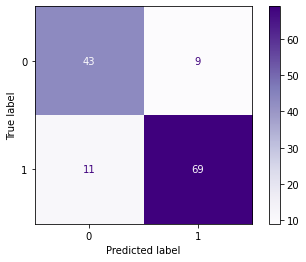

In [20]:
# Plot confusion matrix of results
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Purples')

In [21]:
# Get classification report of metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        52
           1       0.88      0.86      0.87        80

    accuracy                           0.85       132
   macro avg       0.84      0.84      0.84       132
weighted avg       0.85      0.85      0.85       132



In [22]:
# Check coefs
log_reg.coef_

array([[-0.12869746, -1.25776352,  0.12944885, -0.01992416, -0.00629763,
         0.13352094,  0.1003935 ]])

In [23]:
# Put coefs into a df for plotting
Coefs = pd.DataFrame()
Coefs.index = log_reg.feature_names_in_
Coefs['Betas'] = log_reg.coef_[0]

In [24]:
Coefs

,Betas
mpg,-0.128697
cylinders,-1.257764
displacement,0.129449
horsepower,-0.019924
weight,-0.006298
acceleration,0.133521
model_year,0.100394


<AxesSubplot:>

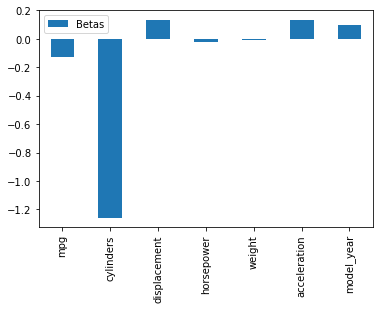

In [25]:
# Plot coefs
Coefs.plot(kind='bar')

## Summary of Model 1

The logistic regression model was 85% accurate when predicting between two classes (USA vs not).

The most influential predictor was cylinders (highest absolute value of all coefficients).

The confusion matrix shows the accurate and mis-classified predictions from the test data.

Overall model accuracy was good but could still be improved. 

# Works with more than 2 categories as well

In [26]:
# Go back to original data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,USA
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1


In [27]:
# Check for null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
USA             0
dtype: int64

In [28]:
# Create a new X and y for train-test split
X = df.drop(columns=['USA', 'name', 'origin'])
y = df.origin

In [29]:
# Check levels of y
y.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [30]:
# Split X and y for train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
# Instantiate new model
log_reg2 = LogisticRegression(max_iter=10000)

In [32]:
# Fit new model
log_reg2.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
# Predict with new model
preds2 = log_reg2.predict(X_test)

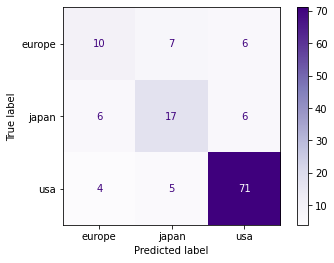

In [34]:
# Plot confusion matrix of results
ConfusionMatrixDisplay.from_estimator(log_reg2, X_test, y_test, cmap='Purples')

In [35]:
# Get metrics on new model
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

      europe       0.50      0.43      0.47        23
       japan       0.59      0.59      0.59        29
         usa       0.86      0.89      0.87        80

    accuracy                           0.74       132
   macro avg       0.65      0.64      0.64       132
weighted avg       0.73      0.74      0.74       132



In [36]:
# Put coefs into a df for plotting
Coefs = pd.DataFrame()
Coefs.index = log_reg2.feature_names_in_
Coefs['Betas'] = log_reg2.coef_[0]

In [37]:
# Check coefficients
Coefs

,Betas
mpg,0.042167
cylinders,0.566395
displacement,-0.055502
horsepower,-0.007120
weight,0.003761
acceleration,-0.016004
model_year,-0.070520


<AxesSubplot:>

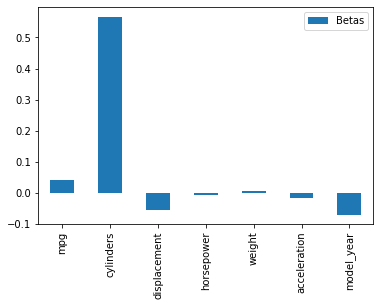

In [38]:
# Plot coefficients
Coefs.plot(kind='bar')

## Model 2 Summary
This logistic regression model classified vehicle origin (USA, Japan, or Europe) based on mpg, cylinders, displacement, horsepower, weight, acceleration, and model_year.

The overall accuracy of the model, as seen in the classification report, is 74%.

The model was better at classifing USA made cars than European and Japanese models, as evidenced in the higher metrics for USA in the classification report and confusion matrix. 

Cylinders was again the most influential predictor when making this classification. 